# Data Augmentation Function

## Setup

### Import Library

In [1]:
import numpy as np
import os
import sys
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, array_to_img
#tf.enable_eager_execution()

from distutils.version import StrictVersion
from matplotlib import pyplot as plt

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.core import preprocessor

if StrictVersion(tf.__version__) < StrictVersion('1.12.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.12.*.')

### Env setup

In [2]:
# This is needed to display the images.
%matplotlib inline

## Get and Check Target Image

### Get Image

In [6]:
!wget https://cdn-ak.f.st-hatena.com/images/fotolife/k/karaage/20190704/20190704020457.jpg -O lonestar.jpg

--2019-07-04 02:09:21--  https://cdn-ak.f.st-hatena.com/images/fotolife/k/karaage/20190704/20190704020457.jpg
cdn-ak.f.st-hatena.com (cdn-ak.f.st-hatena.com) をDNSに問いあわせています... 23.56.18.240
cdn-ak.f.st-hatena.com (cdn-ak.f.st-hatena.com)|23.56.18.240|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 45021 (44K) [image/jpeg]
`lonestar.jpg' に保存中

lonestar.jpg        100%[===================>]  43.97K  --.-KB/s 時間 0.01s      

2019-07-04 02:09:21 (4.50 MB/s) - `lonestar.jpg' へ保存完了 [45021/45021]



### Load and Display Image

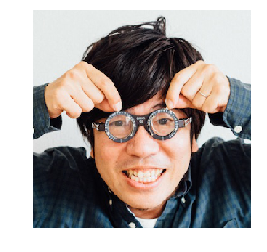

In [4]:
## Load image
img = load_img('lonestar.jpg', color_mode='rgb', target_size=(300,300))

## Display image
plt.axis("off")
plt.imshow(img)

### Convert from Image to Tensor data

In [5]:
img_tf = tf.convert_to_tensor(np.asarray(img))
img_tf = tf.image.resize_images(img_tf, (300, 300))
img_tf = tf.cast(img_tf, tf.float32)
print(img_tf)

Tensor("Cast:0", shape=(300, 300, 3), dtype=float32)


## Data Argumentation

In [6]:
display_size = 3  # n x n

### Normalization

W0706 01:32:15.163969 140735702057856 deprecation.py:323] From ../object_detection/core/preprocessor.py:264: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


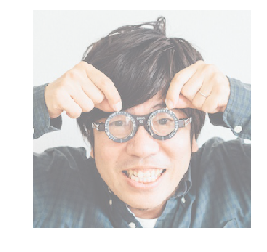

In [7]:
def normalization():
    out_tf = preprocessor.normalize_image(img_tf, 0, 255, 63, 127)
    with tf.Session() as sess:
        result = sess.run(out_tf)

    return array_to_img(result)

plt.axis("off")
plt.imshow(normalization())

### Random Horizontal Flip

W0704 02:09:42.430648 140735702057856 deprecation_wrapper.py:119] From ../object_detection/core/preprocessor.py:512: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



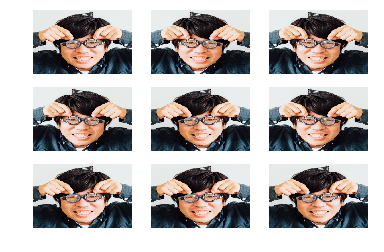

In [11]:
def random_horizontal_flip():
    out_tf = preprocessor.random_horizontal_flip(img_tf)
    with tf.Session() as sess:
        result = sess.run(out_tf)

    return array_to_img(result[0])

for i in range(display_size**2):
    plt.subplot(display_size,display_size,i+1)
    plt.imshow(random_horizontal_flip(), aspect='auto')
    plt.axis("off")
plt.show()

### Random Vertical Flip

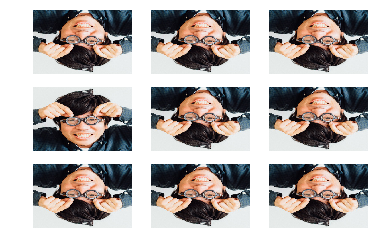

In [12]:
def random_vertical_flip():
    out_tf = preprocessor.random_vertical_flip(img_tf)
    with tf.Session() as sess:
        result = sess.run(out_tf)

    return array_to_img(result[0])

for i in range(display_size**2):
    plt.subplot(display_size,display_size,i+1)
    plt.imshow(random_vertical_flip(), aspect='auto')
    plt.axis("off")
plt.show()

### Random Rotation

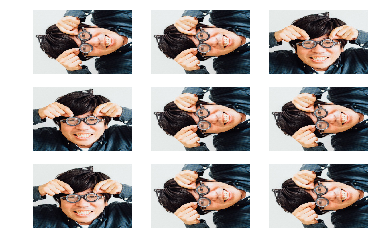

In [13]:
def random_rotation():
    out_tf = preprocessor.random_rotation90(img_tf)
    with tf.Session() as sess:
        result = sess.run(out_tf)
    
    return array_to_img(result[0])

for i in range(display_size**2):
    plt.subplot(display_size,display_size,i+1)
    plt.imshow(random_rotation(), aspect='auto')
    plt.axis("off")
plt.show()

### Random Pixel Value Scale

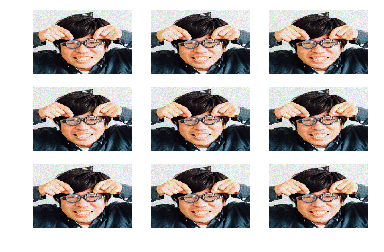

In [14]:
def random_pixel_value_scale():
    out_tf = preprocessor.random_pixel_value_scale(img_tf)
    with tf.Session() as sess:
        result = sess.run(out_tf)

    return array_to_img(result)

for i in range(display_size**2):
    plt.subplot(display_size,display_size,i+1)
    plt.imshow(random_pixel_value_scale(), aspect='auto')
    plt.axis("off")
plt.show()

### Random Image Scale

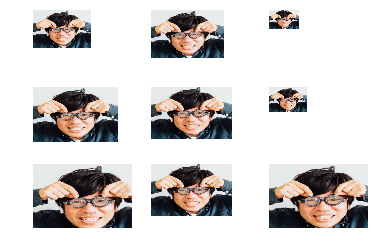

In [19]:
def random_image_scale():
    out_tf = preprocessor.random_image_scale(img_tf)
    with tf.Session() as sess:
        result = sess.run(out_tf)

    return array_to_img(result[0])

for i in range(display_size**2):
    plt.subplot(display_size,display_size,i+1)
    plt.ylim(500, 0)
    plt.xlim(0, 500)
    plt.imshow(random_image_scale(), aspect='auto')
    plt.axis("off")
plt.show()

### Random Rgb to Gray

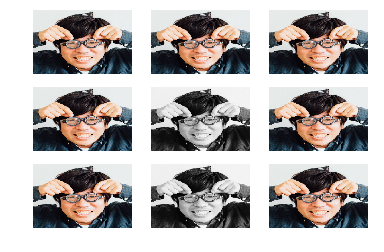

In [30]:
def random_rgb_to_gray():
    out_tf = preprocessor.random_rgb_to_gray(img_tf)
    with tf.Session() as sess:
        result = sess.run(out_tf)

    return array_to_img(result)

for i in range(display_size**2):
    plt.subplot(display_size,display_size,i+1)
    plt.imshow(random_rgb_to_gray(), aspect='auto')
    plt.axis("off")
plt.show()

### Random Adjust Brightness

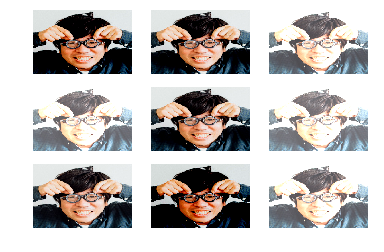

In [31]:
def random_adjust_brightness():
    out_tf = preprocessor.random_adjust_brightness(img_tf, max_delta=0.5)
    with tf.Session() as sess:
        result = sess.run(out_tf)

    return array_to_img(result)

for i in range(display_size**2):
    plt.subplot(display_size,display_size,i+1)
    plt.imshow(random_adjust_brightness(), aspect='auto')
    plt.axis("off")
plt.show()

### Random Adjust Contrast

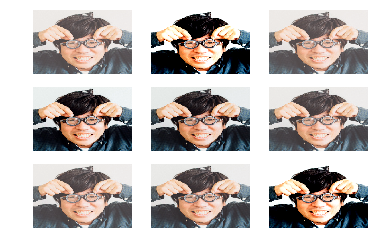

In [32]:
def random_adjust_contras():
    out_tf = preprocessor.random_adjust_contrast(img_tf, min_delta=0.5, max_delta=1.5)
    with tf.Session() as sess:
        result = sess.run(out_tf)

    return array_to_img(result)

for i in range(display_size**2):
    plt.subplot(display_size,display_size,i+1)
    plt.imshow(random_adjust_contras(), aspect='auto')
    plt.axis("off")
plt.show()

### Random Adjust Saturation

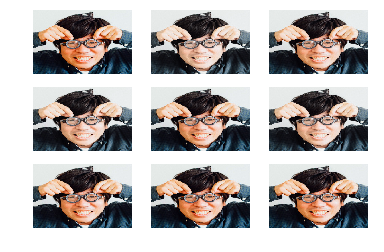

In [33]:
def random_adjust_saturation():
    out_tf = preprocessor.random_adjust_saturation(img_tf, min_delta=0.5, max_delta=1.5)
    with tf.Session() as sess:
        result = sess.run(out_tf)

    return array_to_img(result)

for i in range(display_size**2):
    plt.subplot(display_size,display_size,i+1)
    plt.imshow(random_adjust_saturation(), aspect='auto')
    plt.axis("off")
plt.show()

### Random Distort Color

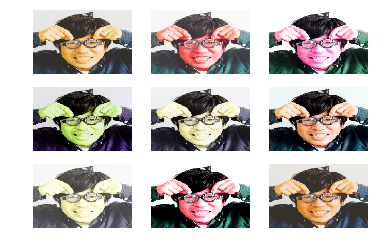

In [34]:
def random_distort_color():
    out_tf = preprocessor.random_distort_color(img_tf, color_ordering=0)
    with tf.Session() as sess:
        result = sess.run(out_tf)

    return array_to_img(result)

for i in range(display_size**2):
    plt.subplot(display_size,display_size,i+1)
    plt.imshow(random_distort_color(), aspect='auto')
    plt.axis("off")
plt.show()

### Random Black Patches

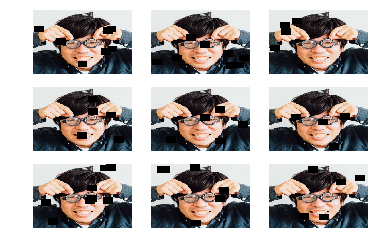

In [35]:
def random_black_patches():
    out_tf = preprocessor.random_black_patches(img_tf)
    with tf.Session() as sess:
        result = sess.run(out_tf)

    return array_to_img(result)

for i in range(display_size**2):
    plt.subplot(display_size,display_size,i+1)
    plt.imshow(random_black_patches(), aspect='auto')
    plt.axis("off")
plt.show()

# Reference Sites
- https://www.tensorflow.org/tutorials/load_data/images?hl=ja
- https://stackoverflow.com/questions/33648322/tensorflow-image-reading-display
- https://www.hellocybernetics.tech/entry/2018/12/04/231714
- https://codeday.me/jp/qa/20190429/727854.html